## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
wholeData = pd.merge(mouse_metadata, study_results, how = "outer")

# Display the data table for preview
wholeData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print(wholeData["Mouse ID"].nunique())


249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
both = ["Mouse ID", "Timepoint"]
# get both columns in a variable
dupTrash = wholeData.loc[wholeData.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dupTrash

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Come back to this


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanData = wholeData.drop_duplicates(subset = both)
cleanData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
print(cleanData["Mouse ID"].nunique())

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

volume = cleanData["Tumor Volume (mm3)"]
regimen = cleanData["Drug Regimen"]

tumorMean = volume.groupby(regimen).mean()
tumorMedian = volume.groupby(regimen).median()
var = volume.groupby(regimen).var()
std = volume.groupby(regimen).std()
sem = volume.groupby(regimen).sem()

summaryFrame = pd.DataFrame({"Mean Volume" : tumorMean,
                            "Median Volume" : tumorMedian,
                            "Volume Variance" : var,
                            "Volume Standard Deviation" : std,
                             "Volume Standard Error" : sem
                            })

summaryFrame.head(20)


,Mean Volume,Median Volume,Volume Variance,Volume Standard Deviation,Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimenGroupTable = cleanData.groupby("Drug Regimen").agg(["mean",
                                        "median",
                                        "var",
                                        "std",
                                        "sem"
                                       ])["Tumor Volume (mm3)"]

regimenGroupTable.rename(columns = {"mean" : "Mean Volume",
                                    "median" : "Median Volume",
                                    "var" : "Volume Variance",
                                    "std" : "Volume Standard Deviation",
                                    "sem" : "Volume Standard Error"
                                   }, inplace = True)

regimenGroupTable.head()


,Mean Volume,Median Volume,Volume Variance,Volume Standard Deviation,Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


Text(0, 0.5, 'Total Number of Measurments')

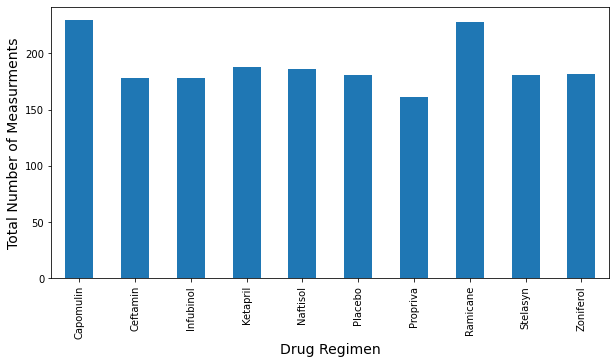

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mouseCountByTreatment = wholeData.groupby(["Drug Regimen"]).count()["Mouse ID"]
print(mouseCountByTreatment) # order bars by size???

pandasBarChart = mouseCountByTreatment.plot.bar(figsize = (10, 5))
plt.xlabel("Drug Regimen", fontsize = 14)
plt.ylabel("Total Number of Measurments", fontsize = 14)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

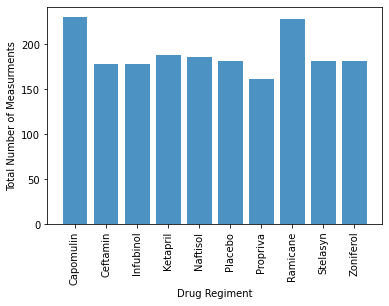

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
xAxis = mouseCountByTreatment.index.values
yAxis = mouseCountByTreatment.values

plt.bar(xAxis, yAxis, alpha = 0.8, align = "center")

plt.xlabel("Drug Regiment")
plt.ylabel("Total Number of Measurments")
plt.xticks(rotation = "vertical")


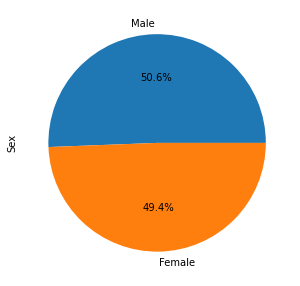

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouseGenderData = wholeData["Sex"].value_counts()

plot = mouseGenderData.plot.pie(y = "Sex", figsize = (5, 5), autopct = "%1.1f%%")


Text(0, 0.5, 'Sex')

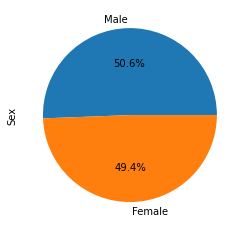

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [50.6, 49.4]
plot = mouseGenderData.plot.pie(y = "Total Count", autopct = "%1.1f%%")
plt.ylabel("Sex")



## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

capFrame = wholeData.loc[wholeData["Drug Regimen"] == "Capomulin",:]
capLast = capFrame.groupby("Mouse ID").max()["Timepoint"]
capVol = pd.DataFrame(capLast)
capMerge = pd.merge(capVol, wholeData, on = ("Mouse ID", "Timepoint"), how = "left")

ramFrame = wholeData.loc[wholeData["Drug Regimen"] == "Ramicane", :]
ramLast = ramFrame.groupby("Mouse ID").max()["Timepoint"]
ramVol = pd.DataFrame(ramLast)
ramMerge = pd.merge(ramVol, wholeData, on = ("Mouse ID", "Timepoint"), how = "left")

infFrame = wholeData.loc[wholeData["Drug Regimen"] == "Infubinol", :]
infLast = infFrame.groupby("Mouse ID").max()["Timepoint"]
infVol = pd.DataFrame(infLast)
infMerge = pd.merge(infVol, wholeData, on = ("Mouse ID", "Timepoint"), how = "left")

cefFrame = wholeData.loc[wholeData["Drug Regimen"] == "Ceftamin", :]
cefLast = cefFrame.groupby("Mouse ID").max()["Timepoint"]
cefVol = pd.DataFrame(cefLast)
cefMerge = pd.merge(cefVol, wholeData, on = ("Mouse ID", "Timepoint"), how = "left")





In [61]:
# Put treatments into a list for for loop (and later for plot labels)
        # I don't use this until the next script but not moving it
        # because the instructions call for it here but I did things differently
DRUGS = ["Capomulin", "Ramicane", "Infubinol", "Cerftamin"]

# Create empty list to fill with tumor vol data (for plotting)
    #did this later

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
def quar(drug):
    frame = wholeData.loc[wholeData["Drug Regimen"] == drug,:]
    last = frame.groupby("Mouse ID").max()["Timepoint"]
    vol = pd.DataFrame(last)
    merge = pd.merge(vol, wholeData, on = ("Mouse ID", "Timepoint"), how = "left")
    quartiles = last.quantile([.25, .5, .75]).round(2)
    low = quartiles[.25],round(2)
    high = quartiles[.75].round(2)
    iqr = high - low
    iqr = iqr.round(2)
    lowBound = low - (1.5 * iqr)
    lowBound = lowBound.round(2)
    higherBound = high + (1.5 * iqr)
    higherBound = higherBound.round(2)
    tumors = merge["Tumor Volume (mm3)"]
    return low, high, iqr, lowBound, higherBound, last, tumors, frame

capLowerQ, capUpperQ, cap_iqr, capLowBound, capUpperBound, capLast, capTumors, capFrame = quar("Capomulin")
ramLowerQ, ramUpperQ, ram_iqr, ramLowBound, ramUpperBound, ramLast, ramTumors, ramFrame = quar("Ramicane")
infLowerQ, infUpperQ, inf_iqr, infLowBound, infUpperBound, infLast, infTumors, infFrame = quar("Infubinol")
cefLowerQ, cefUpperQ, cef_iqr, cefLowBound, cefUpperBound, cefLast, cefTumors, cefFrame = quar("Cerftamin")


Capomulin
0     38.982878
1     38.939633
2     30.485985
3     37.074024
4     40.159220
5     47.685963
6     37.311846
7     38.125164
8     38.753265
9     41.483008
10    38.846876
11    28.430964
12    33.329098
13    46.539206
14    32.377357
15    41.581521
16    23.343598
17    40.728578
18    34.455298
19    31.023923
20    40.658124
21    39.952347
22    36.041047
23    28.484033
24    31.896238
Name: Tumor Volume (mm3), dtype: float64
Cerftamin
Series([], Name: Tumor Volume (mm3), dtype: float64)


<function matplotlib.pyplot.show(close=None, block=None)>

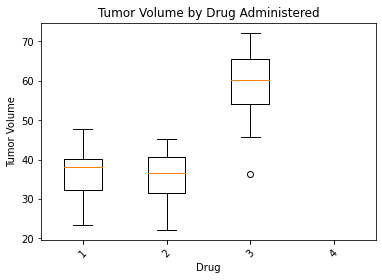

In [62]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
volumeData = [capTumors, ramTumors, infTumors, cefTumors]

fig = plt.figure()
plt.xlabel("Drug")
plt.xticks([1, 2, 3, 4], DRUGS, rotation = 45)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Administered")
plt.boxplot(volumeData)
plt.show
    
    
    
    

## Line and Scatter Plots

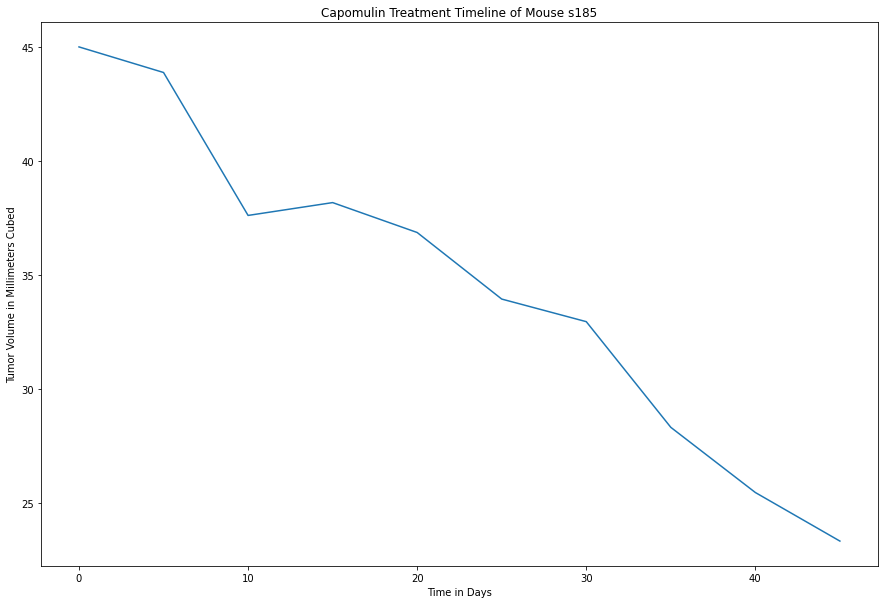

In [67]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capTimeFrame = capFrame.loc[capFrame["Mouse ID"] == "s185",:]

xAxis = capTimeFrame["Timepoint"]
tumorSize = capTimeFrame["Tumor Volume (mm3)"]

fig = plt.subplots(figsize = (15, 10))
plt.title("Capomulin Treatment Timeline of Mouse s185")
plt.plot(xAxis, tumorSize)
plt.xlabel("Time in Days")
plt.ylabel("Tumor Volume in Millimeters Cubed")

plt.show()



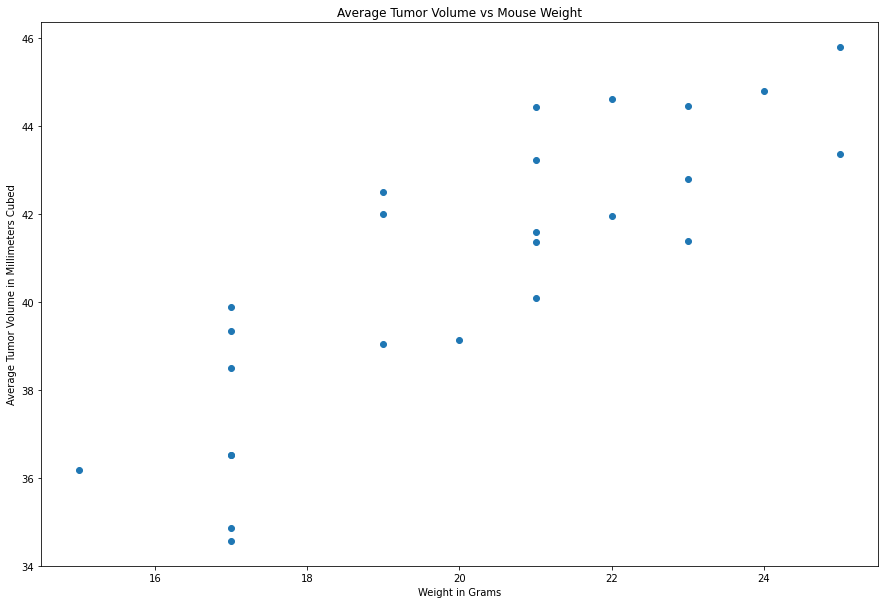

In [70]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig = plt.subplots(figsize = (15, 10))
avgCapTumor = capFrame.groupby(["Mouse ID"]).mean()

plt.scatter(avgCapTumor["Weight (g)"], avgCapTumor["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Weight in Grams")
plt.ylabel("Average Tumor Volume in Millimeters Cubed")

plt.show()


## Correlation and Regression

NameError: name 'ax1' is not defined

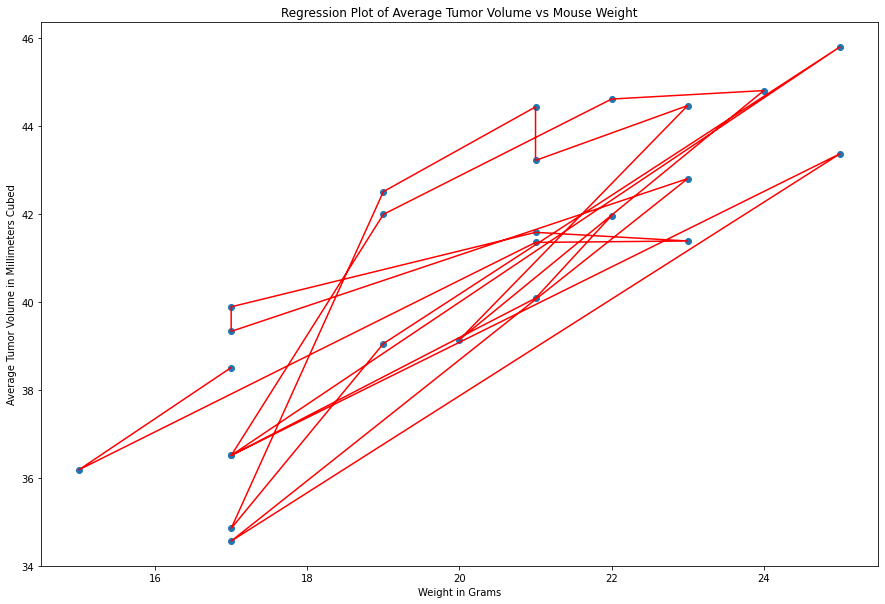

In [71]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen




plt.show()